# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [27]:
# Extract all rows of data
data = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
news_items = []

# Loop through the scraped data to create a list of rows
for row in data:
    td = row.find_all('td')
    row = [col.text for col in td]
    news_items.append(row)



In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(news_items, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [30]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [31]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])  # Change to datetime
df["min_temp"] = df["min_temp"].astype(float)  # Change to float if needed
df["pressure"] = df["pressure"].astype(float)  # Change to float if needed
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
# Display the updated DataFrame and its data types
print(df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [32]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
mars_months_count = df['month'].nunique()
print(f"Number of unique months in the dataset: {mars_months_count}")

Number of unique months in the dataset: 12


In [34]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = df['sol'].nunique ()
print(f"Total number of Martian days (sols) in the dataset: {total_sols}")


Total number of Martian days (sols) in the dataset: 1867


In [35]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print("Average Minimum Temperature by Month:")
print(average_min_temp_by_month)

Average Minimum Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


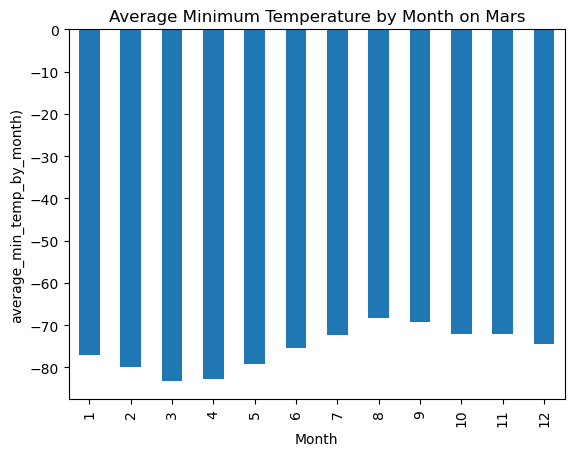

In [36]:
# Plot the average minimum temperature by month
import pandas as pd
import matplotlib.pyplot as plt
average_min_temp_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('average_min_temp_by_month)')
plt.title('Average Minimum Temperature by Month on Mars')
# Show the plot
plt.show()

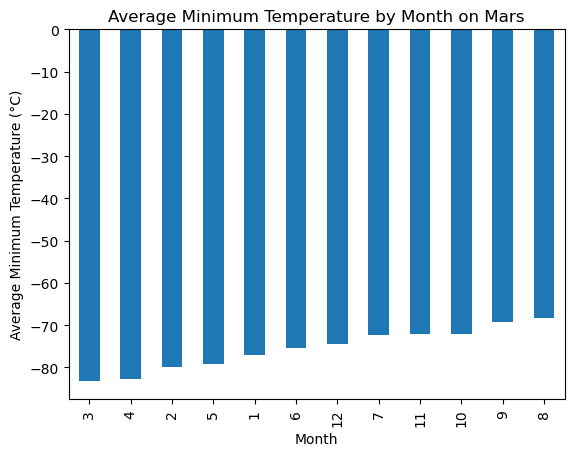

In [37]:
average_min_temp_by_month.sort_values().plot (kind='bar')
# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
# Show the plot
plt.show()


In [38]:
average_pressure_by_month = df.groupby('month')['pressure'].mean()
print("Average pressure  by Month:")
print(average_pressure_by_month)

Average pressure  by Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

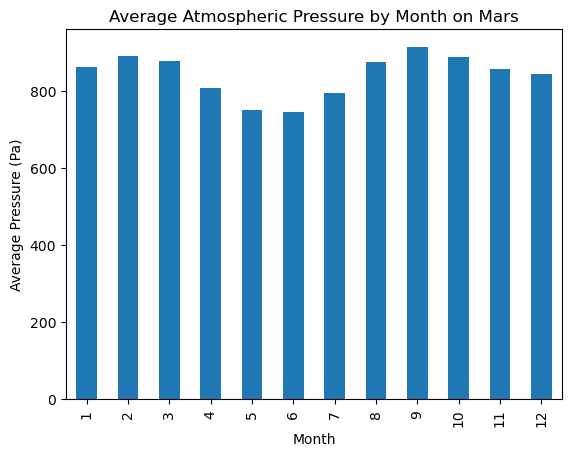

In [39]:
average_pressure_by_month.plot(kind='bar')
# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

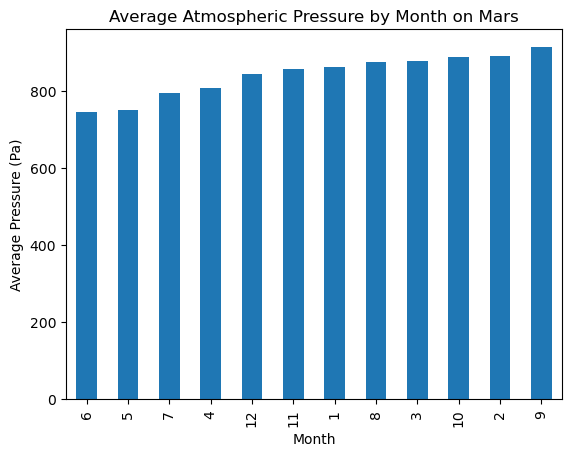

In [40]:

# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
average_pressure_by_month.sort_values().plot (kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show


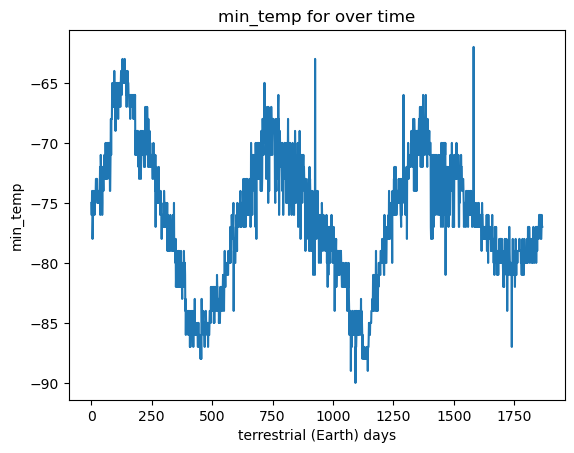

In [41]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.min_temp.plot()
plt.ylabel('min_temp')
plt.title('min_temp for over time')
plt.xlabel('terrestrial (Earth) days')
plt.show()



#### Minimum Temperature

YOUR ANALYSIS HERE

• The lowest temperatures are seen in February (-83.31°C) and March (-83.31°C). These are the coldest months.
• Temperatures begin to rise slightly in April (-82.75°C) and May (-79.31°C), but they remain well below freezing.
• Temperatures begin to rise slightly in April (-82.75°C) and May (-79.31°C), but they remain well below freezing.
  The temperatures continue to warm in June (-75.30°C), July (-72.28°C), and August (-68.38°C), though the warmest month of the year still sees minimum temperatures well below freezing. 
• Temperatures begin to rise slightly in April (-82.75°C) and May (-79.31°C), but they remain well below freezing.
The temperatures begin to cool again after the summer, with a slight decrease in September (-69.17°C), October (-71.98°C), and November (-71.99°C).  
• December sees a slight drop to -74.45°C, returning to colder temperatures similar to those in early winter. 

The temperatures are extremely cold year-round with a slight seasonal variation. 
The region experiences harsh winters and mild summers compared to more temperate climates, with the coldest month being February and the warmest month being August.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

•  Spring and Summer (April–June) see a decline in pressure, with the lowest point being in May and June.
•  Autumn (September–October) has a peak in pressure, with the highest point in September (913.31 mb).
•  After the peak in September, pressure starts to decline again, reaching lower values in November and December.

#### Year Length

YOUR ANALYSIS HERE

•  Temperature Cycle: The planet seems to have distinct seasonal fluctuations with a long warming period (February to August) followed by a cooling period (August to February). 
•  Atmospheric Cycle: The pressure changes further support this idea, with the peak in September and the lowest point in May/June, reflecting the seasonal expansion and contraction of the atmosphere.This suggests the planet experiences seasonal 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:
# Write the data to a CSV

# Sample data for the DataFrame
data = {
    "id": [1, 2, 3],
    "terrestrial_date": ['2024-01-01', '2024-01-02', '2024-01-03'],
    "sol": [500, 501, 502],
    "ls": [100, 101, 102],
    "month": [1, 2, 3],
    "min_temp": [-77.16, -79.93, -83.31],
    "pressure": [862.49, 889.46, 877.32]}

# Create DataFrame
df = pd.DataFrame(data)
print("CSV file has been written successfully.")


CSV file has been written successfully.


In [21]:
browser.quit()